In [1]:
import netCDF4 as nc
import scipy.io as sio
import os,sys,fnmatch,time
from scipy import interpolate
import numpy as np
import numpy.ma as ma
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import cmocean as cmo

from salishsea_tools.nc_tools import scDataset
from salishsea_tools import geo_tools

import sys
sys.path.append('/ocean/imachuca/Canyons/mackenzie_canyon/tools/')
import functions_plot

sys.path.append('/ocean/imachuca/Canyons/analysis_mackenzie_canyon/notebooks/general_circulation/')
import general_functions

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

(cmapmc, norm) = functions_plot.Colormap()
from matplotlib.colors import ListedColormap
cmapmc_r = ListedColormap(cmapmc.colors[::-1])
from matplotlib.colors import LinearSegmentedColormap
colour_list = ["#c8274c","#f25546","#F06543","#e96e33",
               "#f0b038","#FFE74C","#69b944","#72b286",
               "#69b0bc","#619ee4","#4b5bbb"][::-1]
cmapIAM = LinearSegmentedColormap.from_list('mycmap', colour_list, N=500, gamma=1)

/home/imachuca/anaconda3/envs/gsw/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


# Loading observations data

In [2]:
! ls

img_MvO_map_1.png		 MvO_speeds_quiver_interpolated.ipynb
img_MvO_map_2.png		 MvO_speeds_quiver.ipynb
img_MvO_map.png			 MvO_S_slices_scatter.ipynb
img_MvO_salt_double.png		 MvO_TS_cross_sections.ipynb
img_MvO_S_double.png		 MvO_U_slices_scatter_interpolated.ipynb
img_MvO_speeds_double_1.png	 MvO_U_slices_scatter.ipynb
img_MvO_speeds_double_2.png	 MvO_V_slices_scatter_interpolated.ipynb
img_MvO_temp_double.png		 MvO_V_slices_scatter.ipynb
img_MvO_U_double.png		 O_data_overview.ipynb
img_MvO_V_double.png		 O_first_look.ipynb
MackenzieTransects2.mat		 README.md
MackenzieTransects.mat		 ud_dep83_A.png
MackenzieTransects_original.mat  ud_dep83_B.png
make_readme.py			 untitled.txt
make_readme.py~


In [3]:
data = sio.loadmat('./MackenzieTransects.mat')

In [4]:
struct_axis = data['ax']
struct_slope = data['cs']
struct_north = data['stn']
struct_south = data['sts']

In [5]:
dtype_axis = struct_axis.dtype
dtype_slope = struct_slope.dtype
dtype_north = struct_north.dtype
dtype_south = struct_south.dtype

In [6]:
data_axis = {n: struct_axis[n][0, 0] for n in dtype_axis.names}
data_slope = {n: struct_slope[n][0, 0] for n in dtype_slope.names}
data_north = {n: struct_north[n][0, 0] for n in dtype_north.names}
data_south = {n: struct_south[n][0, 0] for n in dtype_south.names}

In [7]:
data_south['latx'].shape, data_south['lonx'].shape, data_south['temp'].shape

#2 ((1, 233), (1, 233), (370, 233))
#1 ((1, 222), (1, 222), (370, 222))

# 1 ((1, 1133), (1, 1133), (26, 1133))
# 2 ((1, 1123), (1, 1123), (26, 1123))

((1, 216), (1, 216), (370, 216))

In [8]:
data_south['pRefAvg'].shape

(1, 5)

In [11]:
dtype_axis.names

('u',
 'v',
 'lat_adcp',
 'lon_adcp',
 'datenum_adcp',
 'z',
 'u75',
 'v75',
 'lat75_adcp',
 'lon75_adcp',
 'datenum75_adcp',
 'z75',
 'tsgT',
 'tsgS',
 'wind_sp',
 'wind_dir',
 'wind_datenum')

In [12]:
dtype_south.names

('num',
 'numbMMP',
 'numbSWIMS',
 'dissNum',
 'typ',
 'latx',
 'lonx',
 'dep_c',
 'dis_c',
 'dist',
 'z',
 'temp',
 'sal',
 'sigma',
 'diss',
 'datenum',
 'dissAvg',
 'tempAvg',
 'sigmaAvg',
 'dTdzAvg',
 'n2Avg',
 'latAvg',
 'lonAvg',
 'distAvg',
 'kappaAvg',
 'HeatFluxAvg',
 'u',
 'v',
 'z_adcp',
 'lat_adcp',
 'lon_adcp',
 'datenum_adcp',
 'dist_adcp',
 'u75',
 'v75',
 'z75_adcp',
 'lat75_adcp',
 'lon75_adcp',
 'datenum75_adcp',
 'dist75_adcp',
 'tsgT',
 'tsgS',
 'wind_sp',
 'wind_dir',
 'wind_datenum',
 'pRefChange',
 'pRefAvg',
 'salRef',
 'tempRef')

In [13]:
dtype_slope.names

('num',
 'numbMMP',
 'numbCTD',
 'dissNum',
 'typ',
 'latx',
 'lonx',
 'dep_c',
 'dis_c',
 'dist',
 'z',
 'temp',
 'sal',
 'sigma',
 'diss',
 'datenum',
 'dist_interp',
 'temp_interp',
 'sigma_interp',
 'dissAvg',
 'tempAvg',
 'sigmaAvg',
 'dTdzAvg',
 'n2Avg',
 'latAvg',
 'lonAvg',
 'distAvg',
 'kappaAvg',
 'HeatFluxAvg',
 'u',
 'v',
 'z_adcp',
 'lat_adcp',
 'lon_adcp',
 'datenum_adcp',
 'dist_adcp',
 'u75',
 'v75',
 'z75_adcp',
 'lat75_adcp',
 'lon75_adcp',
 'datenum75_adcp',
 'dist75_adcp',
 'tsgT',
 'tsgS',
 'wind_sp',
 'wind_dir',
 'wind_datenum',
 'pRefChange',
 'pRefAvg',
 'salRef',
 'tempRef')

In [14]:
dtype_north.names

('num',
 'numbMMP',
 'numbCTD',
 'dissNum',
 'typ',
 'latx',
 'lonx',
 'dep_c',
 'dis_c',
 'dist',
 'z',
 'temp',
 'sal',
 'sigma',
 'diss',
 'datenum',
 'dissAvg',
 'tempAvg',
 'sigmaAvg',
 'n2Avg',
 'dTdzAvg',
 'latAvg',
 'lonAvg',
 'distAvg',
 'kappaAvg',
 'HeatFluxAvg',
 'u',
 'v',
 'z_adcp',
 'lat_adcp',
 'lon_adcp',
 'datenum_adcp',
 'dist_adcp',
 'u75',
 'v75',
 'z75_adcp',
 'lat75_adcp',
 'lon75_adcp',
 'datenum75_adcp',
 'dist75_adcp',
 'tsgT',
 'tsgS',
 'wind_sp',
 'wind_dir',
 'wind_datenum',
 'pRefChange',
 'pRefAvg',
 'salRef',
 'tempRef')

# Coordinates

In [15]:
obs_lat_s = data_south['latx'][0,:]
obs_lon_s = data_south['lonx'][0,:]

obs_lat_s_a = data_south['lat_adcp'][0,:]
obs_lon_s_a = data_south['lon_adcp'][0,:]

obs_lat_n = data_north['latx'][0,:]
obs_lon_n = data_north['lonx'][0,:]

obs_lat_n_a = data_north['lat_adcp'][0,:]
obs_lon_n_a = data_north['lon_adcp'][0,:]

obs_lat_p = data_slope['latx'][0,:]
obs_lon_p = data_slope['lonx'][0,:]

obs_lat_p_a = data_slope['lat_adcp'][0,:]
obs_lon_p_a = data_slope['lon_adcp'][0,:]

obs_lat_x_a = data_axis['lat_adcp'][0,:]
obs_lon_x_a = data_axis['lon_adcp'][0,:]

# Overview

In [16]:
def get_coords(dirname):
    y,x = slice(1,-1,None), slice(1,-1,None)
    
    nav_lat = nc.Dataset(dirname)['nav_lat'][y, x]
    nav_lon = nc.Dataset(dirname)['nav_lon'][y, x]
    real = nc.Dataset(dirname)['Bathymetry'][y, x]

    return nav_lat, nav_lon, real

In [17]:
def plot_map(fig, ax, x, y, z, cmap, nav_lon, nav_lat, real):
    p = ax.pcolormesh(x, y, z, cmap=cmapmc, vmin=-1300, vmax=800)
    CS = ax.contour(nav_lon, nav_lat, real, levels = np.arange(0, 500, 20), colors='k', linestyle='-', alpha=0.5)
    for line in CS.collections:
        if line.get_linestyle() == [(None, None)]:
            pass
        else:
            line.set_linestyle([(None, None)])
            line.set_color('k')
    ax.clabel(CS, fmt='%1.1f')
    ax.legend(loc=2, fontsize=20)
    ax.set_xlim([-141, -136])
    ax.set_ylim([69.5, 71.1])
    w=1/math.cos(math.radians(70.0))
    ax.set_aspect(w)
    ax.set_ylabel('latitude [$^o$]', fontsize=20)
    ax.set_xlabel('longitude [$^o$]', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    fig.tight_layout()
    return fig, ax

In [18]:
x, y, z = functions_plot.def_regionG(xl=-141, xr=-136, yb=69.5, yt=71.1)

In [19]:
dirname = '/ocean/imachuca/Canyons/results_mackenzie/runs_with_ts/real_base/1_real_bathy_for_agrif_fix.nc'
nav_lat, nav_lon, real = get_coords(dirname)

No handles with labels found to put in legend.


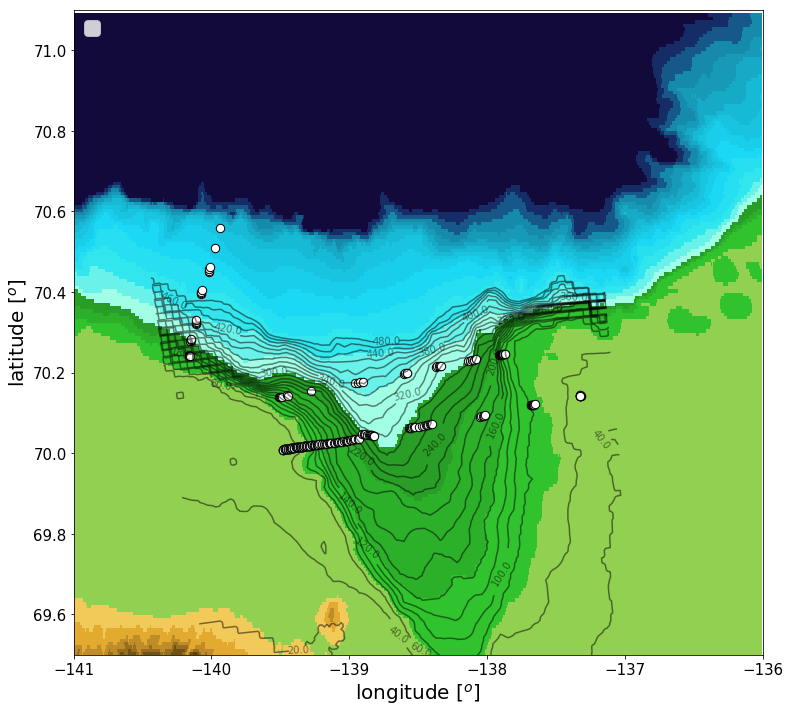

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

fig, ax = plot_map(fig, ax, x, y, z, cmapmc_r, nav_lon, nav_lat, real)

ax.scatter(obs_lon_s, obs_lat_s, c='w', s=70, edgecolors='k')
ax.scatter(obs_lon_n, obs_lat_n, c='w', s=70, edgecolors='k')
ax.scatter(obs_lon_p, obs_lat_p, c='w', s=70, edgecolors='k')

#fig.savefig('img_MvO_map_1.png', dpi=100)

No handles with labels found to put in legend.


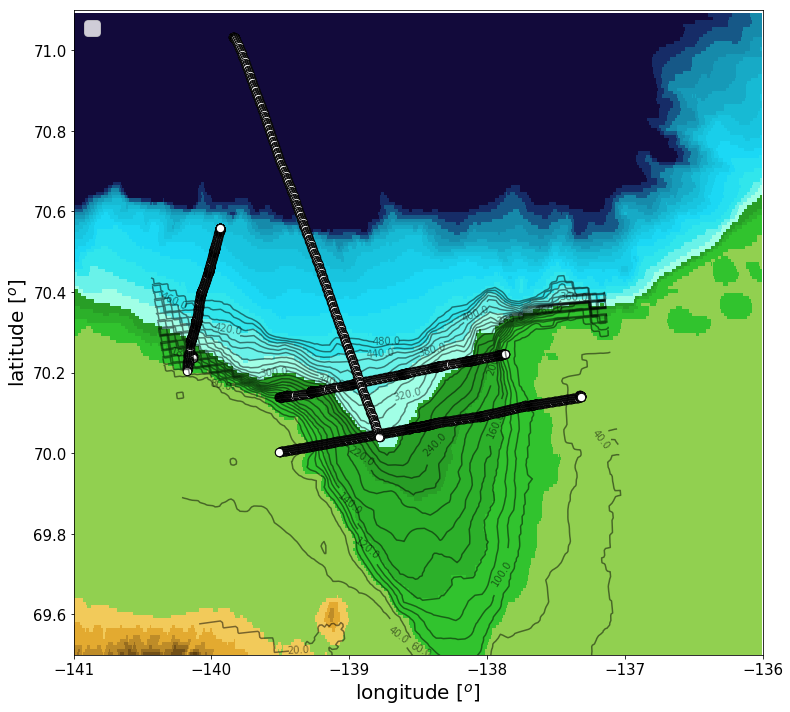

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

fig, ax = plot_map(fig, ax, x, y, z, cmapmc_r, nav_lon, nav_lat, real)

ax.scatter(obs_lon_s_a, obs_lat_s_a, c='w', s=70, edgecolors='k')
ax.scatter(obs_lon_n_a, obs_lat_n_a, c='w', s=70, edgecolors='k')
ax.scatter(obs_lon_p_a, obs_lat_p_a, c='w', s=70, edgecolors='k')
ax.scatter(obs_lon_x_a, obs_lat_x_a, c='w', s=70, edgecolors='k')

#fig.savefig('img_MvO_map_2.png', dpi=100)